In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def generate_waveline(num_points):
    x = np.linspace(0.5, 0.5 + 2*np.pi, num_points)
    y = 0.3*np.sin(x) + 0.4*np.sin(2*x) - 0.2*np.sin(0.5*x)
    return x.reshape((-1,1)),y

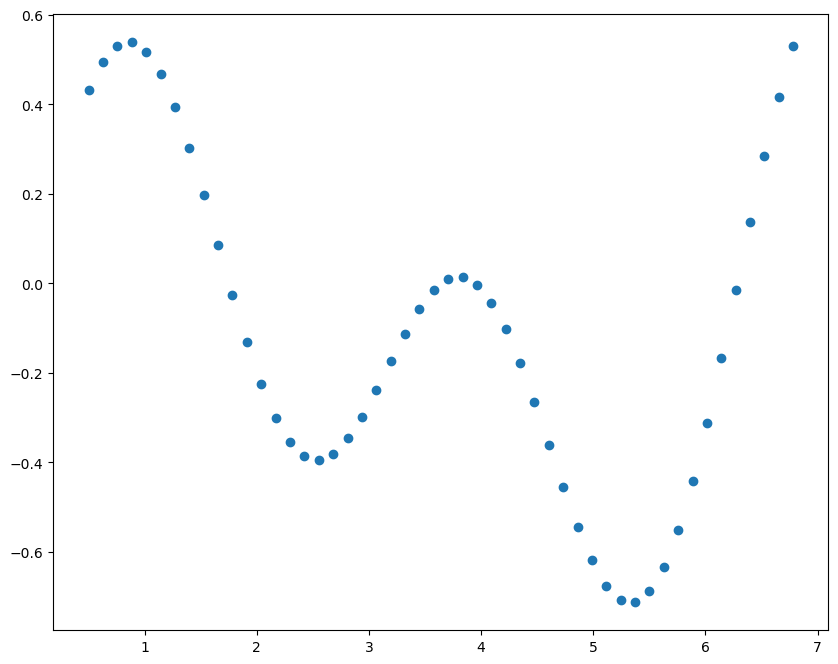

In [16]:
X,y = generate_waveline(50)
plt.figure(figsize = (10,8))
plt.plot(X, y.real, "o")

Model plot in Opflow Qnn <br>

Rx : depends on data input <br>
U : aribitrary single qubit unitaries <br>

In [19]:
from qiskit import *
from qiskit.circuit import Parameter,ParameterVector

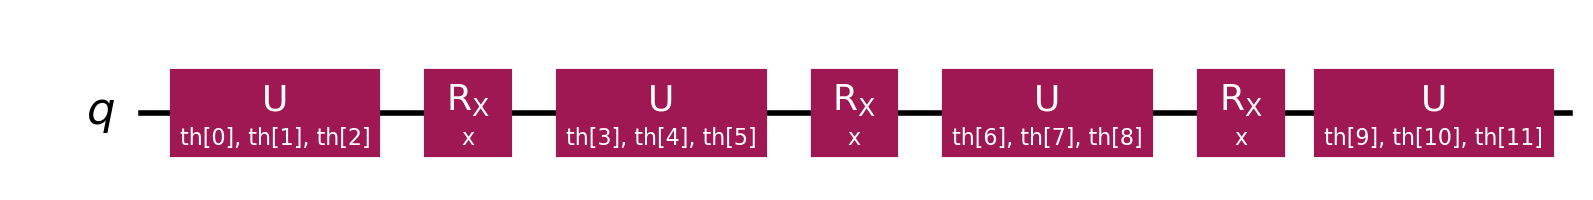

In [20]:
reps = 3
circuit = QuantumCircuit(1)
x = Parameter("x")
theta = ParameterVector("th", 3*(reps+1))

for i in range(reps):
    circuit.u(theta[3*i], theta[3*i+1], theta[3*i+2],0)
    circuit.rx(x,0)
    
circuit.u(*theta[-3:],0)

circuit.draw("mpl", style="iqx", scale =2)

Now, we want to define the observalbe that we want to measure which is Pauli Z operator 

In [22]:
from qiskit_machine_learning.neural_networks import OpflowQNN
from qiskit.opflow import Z, StateFn

In [24]:
expectation = StateFn(Z, is_measurement = True)@ StateFn(circuit)
qnn = OpflowQNN(expectation, 
                input_params = [x], 
                weight_params=list(theta),
               quantum_instance = BasicAer.get_backend("statevector_simulator"))

Neural Network Regressor 

In [25]:
from qiskit_machine_learning.algorithms import NeuralNetworkRegressor

In [26]:
loss_history = []
def store_loss(weights, loss_value):
    loss_history.append(loss_value)
regressor = NeuralNetworkRegressor(neural_network = qnn,
                                  optimize = COBYLA(),
                                  loss = "squared_error",
                                  callback = store_loss)

NameError: name 'COBYLA' is not defined